<a href="https://colab.research.google.com/github/nrutyadoshi/NLP/blob/Lab/NLP_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nrutya Doshi J013 
#Rishabh Jain J021
#Reuben Rapose J040 

Importing important libraries

In [0]:
import pandas as pd 
import numpy as np

Importing dataset

In [0]:
# Import datasets
train = pd.read_csv('/content/tweet_train.csv')
test = pd.read_csv('/content/tweet_test.csv')
sample = pd.read_csv('/content/sample_submission.csv')

Calculating & removing na values

In [317]:
# Calculating number of na values in dataframe
train.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [0]:
# Droping na values
train.dropna(inplace=True)

In [319]:
# Now no na values
train.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [320]:
train.head()

,textID,text,selected_text,sentiment
0,a3d0a7d5ad,Spent the entire morning in a meeting w/ a ven...,my boss was not happy w/ them. Lots of fun.,neutral
1,251b6a6766,Oh! Good idea about putting them on ice cream,Good,positive
2,c9e8d1ef1c,says good (or should i say bad?) afternoon! h...,says good (or should i say bad?) afternoon!,neutral
3,f14f087215,i dont think you can vote anymore! i tried,i dont think you can vote anymore!,negative
4,bf7473b12d,haha better drunken tweeting you mean?,better,positive


Making a wordcloud representation

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plotWordClouds(df_text,sentiment):
    text = " ".join(str(tmptext) for tmptext in df_text)
    text = text.lower()
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(text)
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title('WordCloud - ' + sentiment)
    plt.show()         


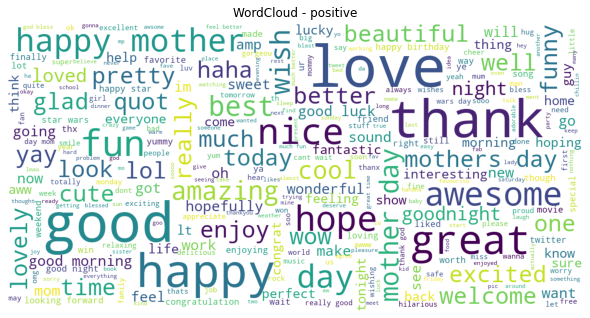

In [323]:
subtext = train[train['sentiment']=='positive']['selected_text']
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 
plotWordClouds(subtext,'positive')


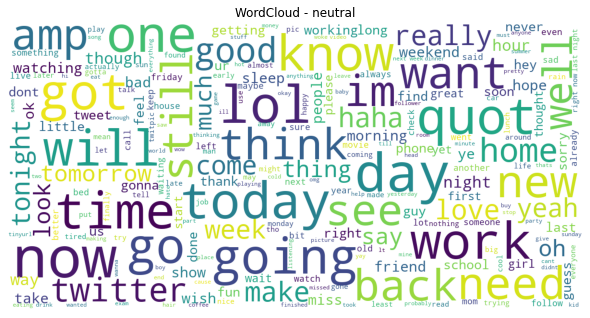

In [324]:
subtext = train[train['sentiment']=='neutral']['selected_text']
plotWordClouds(subtext,'neutral')


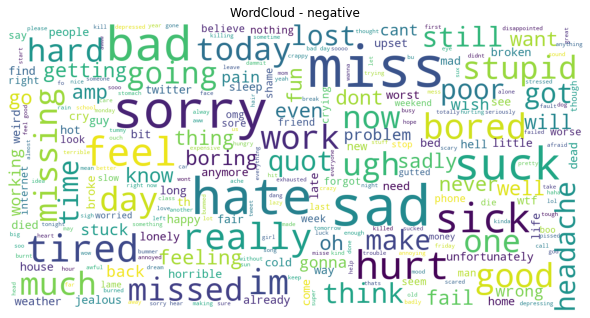

In [325]:
subtext = train[train['sentiment']=='negative']['selected_text']
plotWordClouds(subtext,'negative')

Pre-processing the data

Converting the train & test data to lowercase

In [0]:
# Make all the text lowercase - casing doesn't matter when 
# we choose our selected text.
train['text'] = train['text'].apply(lambda x: x.lower())
test['text'] = test['text'].apply(lambda x: x.lower())

Taking only words that contain alphabets in train data i.e. removing punctuations & numbers

In [0]:
import re

In [0]:
def text_data(str): # taking only the text data
  str_new = " ".join(re.findall("[a-zA-Z]+", str))
  return (str_new)

In [0]:
train['text'] = train['text'].apply(lambda x: text_data(x))
train['selected_text'] = train['selected_text'].apply(lambda x: text_data(x))

In [343]:
train.head()

,textID,text,selected_text,sentiment
0,a3d0a7d5ad,spent the entire morning in a meeting w a vend...,my boss was not happy w them Lots of fun,neutral
1,251b6a6766,oh good idea about putting them on ice cream,Good,positive
2,c9e8d1ef1c,says good or should i say bad afternoon http p...,says good or should i say bad afternoon,neutral
3,f14f087215,i dont think you can vote anymore i tried,i dont think you can vote anymore,negative
4,bf7473b12d,haha better drunken tweeting you mean,better,positive


Splitting the train data into train & validation set as we want to see how the mdethod we created would would on the final test data

In [0]:
# Make training/test split
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(train, train_size = 0.9, random_state = 0)

In [345]:
X_train.head()

,textID,text,selected_text,sentiment
22334,c567a2c2f2,is heading off to the fair,is heading off to the fair,neutral
17111,a2e1121aa7,new pollster data on party identification in t...,OUCH,negative
9228,7e26065fff,agree with you about facehunter embarrassing r...,agree with you,positive
10443,476dd96b49,eeehhh my right eye s twitching gonna go and w...,happy,positive
16422,6507410f7d,is way too sleepy to be awake,is way too sleepy to be awake,neutral


Cleaning the X_train data

In [346]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

Tokenization

In [0]:
def tokenize(str_new): # tokenization
  tokens = []
  tokens = nltk.word_tokenize(str_new)
  return (tokens)

In [0]:
X_train['text'] = X_train['text'].apply(lambda x: tokenize(x))
X_train['selected_text'] = X_train['selected_text'].apply(lambda x: tokenize(x))

Removing stopwords

In [0]:
from nltk.corpus import stopwords
def remove(tokens): # removing stopwords & punctuations
  removed = []
  stopword = stopwords.words('english') 
  for w in tokens:
    if (w not in stopword):
      removed.append(w)
  return (removed)

In [0]:
X_train['text'] = X_train['text'].apply(lambda x: remove(x))
X_train['selected_text'] = X_train['selected_text'].apply(lambda x: remove(x))

POS tagging

In [0]:
def tagging(removed):
  pos = []
  pos.append(nltk.pos_tag(removed))
  return (pos)

In [0]:
X_train['text'] = X_train['text'].apply(lambda x: tagging(x))
X_train['selected_text'] = X_train['selected_text'].apply(lambda x: tagging(x))

Lemmatization

In [0]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [0]:
def lemmatization(pos):
  lem = WordNetLemmatizer()
  lemma = []
  for word in pos:
    for w in word:
      pos_value = ""
      if (w[1].startswith('J')):
        pos_value = wordnet.ADJ
      elif (w[1].startswith('V')):
        pos_value = wordnet.VERB
      elif (w[1].startswith('N')):
        pos_value = wordnet.NOUN
      elif (w[1].startswith('R')):
        pos_value = wordnet.ADV 
      else:
        continue
      lemma.append(lem.lemmatize(w[0],pos_value))
  return (lemma)

In [0]:
X_train['text'] = X_train['text'].apply(lambda x: lemmatization(x))
X_train['selected_text'] = X_train['selected_text'].apply(lambda x: lemmatization(x))

Converting list to string

In [0]:
def to_string(lemma): # converting the data from list to string format for tfidf
  str1 = ' '.join([elem for elem in lemma]) 
  return (str1)

In [0]:
X_train['text'] = X_train['text'].apply(lambda x: to_string(x))
X_train['selected_text'] = X_train['selected_text'].apply(lambda x: to_string(x))

In [358]:
X_train.head()

,textID,text,selected_text,sentiment
22334,c567a2c2f2,head fair,head fair,neutral
17111,a2e1121aa7,new pollster data party identification united ...,OUCH,negative
9228,7e26065fff,agree facehunter embarrass representation comp...,agree,positive
10443,476dd96b49,eeehhh right eye twitch gon go watch boystown ...,happy,positive
16422,6507410f7d,way sleepy awake,way sleepy awake,neutral


Creating different dataset for different sentiments

In [0]:
pos_train = X_train[X_train['sentiment'] == 'positive'] # contains all positive
neutral_train = X_train[X_train['sentiment'] == 'neutral']
neg_train = X_train[X_train['sentiment'] == 'negative']

Using count vectorizer to convert words to numbers

In [0]:
# CountVectorizer will help calculate word counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word',max_df=0.95,stop_words='english')

In [0]:
X_train_cv = cv.fit_transform(X_train['text']) # has only text data

In [0]:
X_pos = cv.transform(pos_train['text'])
X_neutral = cv.transform(neutral_train['text'])
X_neg = cv.transform(neg_train['text'])

In [0]:
pos_count_df = pd.DataFrame(X_pos.toarray(), columns=cv.get_feature_names())
neutral_count_df = pd.DataFrame(X_neutral.toarray(), columns=cv.get_feature_names())
neg_count_df = pd.DataFrame(X_neg.toarray(), columns=cv.get_feature_names())

We caculate a score for each word, which is like a tf-idf score

Term frequency value is calculated, here for positive, pos contains the number of times a word occurs in the positive sentiment (datframe), pos_train.shape[0] will denote the number of documents 

In [0]:
# Create dictionaries of the words within each sentiment group, where the values are the proportions of tweets that contain those words

pos_words = {}
neutral_words = {}
neg_words = {}

In [0]:
for k in cv.get_feature_names(): # for every word 
    pos = pos_count_df[k].sum() # number of times the positive word occurs
    neutral = neutral_count_df[k].sum()
    neg = neg_count_df[k].sum()
    pos_words[k] = pos/pos_train.shape[0] # pos_train.shape[0] - total positive documents, therefore positive word/ positive documents, term frequency
    neutral_words[k] = neutral/neutral_train.shape[0]
    neg_words[k] = neg/neg_train.shape[0]

Inverse document frequency is calculated here, for positive, the tf of negative & neutral is subtracted from positive, to determine how positive a word is

In [0]:
# We need to account for the fact that there will be a lot of words used in tweets of every sentiment.  
# Therefore, we reassign the values in the dictionary by subtracting the proportion of tweets in the other 
# sentiments that use that word.
pos_words_adj = {}
neutral_words_adj = {}
neg_words_adj = {}

In [0]:
for key, value in pos_words.items():
    pos_words_adj[key] = pos_words[key] - (neutral_words[key] + neg_words[key]) # this is basically idf, which means how positive is the word, does it occur in negative & neutral
    
for key, value in neutral_words.items():
    neutral_words_adj[key] = neutral_words[key] - (neg_words[key] + pos_words[key])

for key, value in neg_words.items():
    neg_words_adj[key] = neg_words[key] - (neutral_words[key] + pos_words[key])

Here we determine the answer for the X_val, we make subset of words such that 1 gram, 2 gram, ..., then we calculate the score for the validation input using the scores for each word calculated in the previous cell, the subset with the highest score is the answer

In [0]:
def calculate_selected_text(df_row, tol = 0):
    
    tweet = df_row['text']
    sentiment = df_row['sentiment']
    
    if(sentiment == 'neutral'):
        return tweet 
    
    elif(sentiment == 'positive'):
        dict_to_use = pos_words_adj # Calculate word weights using the pos_words dictionary
    elif(sentiment == 'negative'):
        dict_to_use = neg_words_adj # Calculate word weights using the neg_words dictionary
        
    words = tweet.split()
    words_len = len(words)
    subsets = [words[i:j+1] for i in range(words_len) for j in range(i,words_len)] # taking combination of words 1 gram, 2 gram, ..., with 1st word, 2nd word
        
    score = 0
    selection_str = '' # This will be our choice
    lst = sorted(subsets, key = len) # Sort candidates by length for each subset
    
    
    for i in range(len(subsets)): # for all possiblities
        
        new_sum = 0 # Sum for the current substring
        
        # Calculate the sum of weights for each word in the substring
        for p in range(len(lst[i])): # go length wise
            if(lst[i][p] in dict_to_use.keys()):
                new_sum += dict_to_use[lst[i][p]]
                
            
        # If the sum is greater than the score, update our current selection
        if(new_sum > score + tol): 
            score = new_sum
            selection_str = lst[i]
            #tol = tol*5 # Increase the tolerance a bit each time we choose a selection

    # If we didn't find good substrings, return the whole text
    if(len(selection_str) == 0):
        selection_str = words                   
        
    return ' '.join(selection_str)

In [0]:
tol = 0.0015

X_val['predicted_selection'] = ''

for index, row in X_val.iterrows(): # rows in X validation set
    
    selected_text = calculate_selected_text(row, tol)
    
    X_val.loc[X_val['textID'] == row['textID'], ['predicted_selection']] = selected_text

We calculate the jaccard score to see how accurate is our prediction, we basically see the similarity

In [0]:
def jaccard(str1, str2): # to see similarity
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c)) 

In [371]:
X_val['jaccard'] = X_val.apply(lambda x: jaccard(x['selected_text'], x['predicted_selection']), axis = 1)

print('The jaccard score for the validation set is:', np.mean(X_val['jaccard']))

The jaccard score for the validation set is: 0.6469968930589106


In [372]:
X_val

,textID,text,selected_text,sentiment,predicted_selection,jaccard
15332,e45d640ba0,is sooo stressed about everything i have to do,is sooo stressed about everything I have to do,negative,is sooo stressed about everything i have to do,1.000000
21800,dfa0d5ca14,i just dyededed my hair,I just dyededed my hair,neutral,i just dyededed my hair,1.000000
18790,051f106b59,at the pub with the dog but seems to have misp...,At the pub with the dog but seems to have misp...,neutral,at the pub with the dog but seems to have misp...,1.000000
8220,4c1897aa51,ugh still sick this calgary cold has lasted fo...,Ugh still sick This Calgary cold has lasted fo...,negative,ugh still sick,0.333333
5243,daf57be394,rt barcampbkk for entertainment at night bring...,enjoy,positive,enjoy,1.000000
...,...,...,...,...,...,...
4782,959cf83062,seen mi abueltia at the hospital she s doing good,she s doing good,positive,good,0.250000
15668,0239b93bf5,what was said,what was said,neutral,what was said,1.000000
4696,4cd390c007,still no reply from about my simfinger problem...,sorry guys,negative,sorry,0.500000
16932,fb95fce6b7,like you re not enjoying the hell out if it,Like you re not enjoying the hell out if it,neutral,like you re not enjoying the hell out if it,1.000000


Now we fit the model on our entire train data & calculate the prediction for test data 

In [0]:
pos_tr = train[train['sentiment'] == 'positive']
neutral_tr = train[train['sentiment'] == 'neutral']
neg_tr = train[train['sentiment'] == 'negative']

Count Vectorizer

In [0]:
cv = CountVectorizer(analyzer='word',max_df=0.95, min_df=2,stop_words='english')

final_cv = cv.fit_transform(train['text'])

X_pos = cv.transform(pos_tr['text'])
X_neutral = cv.transform(neutral_tr['text'])
X_neg = cv.transform(neg_tr['text'])

pos_final_count_df = pd.DataFrame(X_pos.toarray(), columns=cv.get_feature_names())
neutral_final_count_df = pd.DataFrame(X_neutral.toarray(), columns=cv.get_feature_names())
neg_final_count_df = pd.DataFrame(X_neg.toarray(), columns=cv.get_feature_names())

Score for each word (TF-IDF value)

In [0]:
pos_words = {}
neutral_words = {}
neg_words = {}

for k in cv.get_feature_names():
    pos = pos_final_count_df[k].sum()
    neutral = neutral_final_count_df[k].sum()
    neg = neg_final_count_df[k].sum()
    
    pos_words[k] = pos/(pos_tr.shape[0])
    neutral_words[k] = neutral/(neutral_tr.shape[0])
    neg_words[k] = neg/(neg_tr.shape[0])

In [0]:
neg_words_adj = {}
pos_words_adj = {}
neutral_words_adj = {}

for key, value in neg_words.items():
    neg_words_adj[key] = neg_words[key] - (neutral_words[key] + pos_words[key])
    
for key, value in pos_words.items():
    pos_words_adj[key] = pos_words[key] - (neutral_words[key] + neg_words[key])
    
for key, value in neutral_words.items():
    neutral_words_adj[key] = neutral_words[key] - (neg_words[key] + pos_words[key])

Prediction

In [0]:
tol = 0.001

for index, row in test.iterrows():
    
    selected_text = calculate_selected_text(row, tol)
    
    sample.loc[sample['textID'] == row['textID'], ['selected_text']] = selected_text

In [378]:
sample.head()

,textID,selected_text
0,11aa4945ff,wish
1,fd1db57dc0,i'm done.haha. house md marathon ulet
2,2524332d66,i'm concerned for that family
3,0fb19285b2,hey guys it's working no need to worry. i have...
4,e6c9e5e3ab,26th february


Writing the prediction in the submission.csv file

In [0]:
sample.to_csv('submission.csv', index = False)